In [2]:
import pandas as pd

In [1]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.6/241.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.7/414.7 kB 20.5 MB/s eta 0:00:00
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━

In [4]:
y1 = pd.read_excel('Fz_Rfg Substitute Meat_POS_2020.xlsx')
y2 = pd.read_excel('Fz_Rfg Substitute Meat_POS_2021.xlsx')
y3 = pd.read_excel('Fz_Rfg Substitute Meat_POS_2022.xlsx')
y4 = pd.read_excel('Fz_Rfg Substitute Meat_POS_2023.xlsx')
y5 = pd.read_excel('Fz_Rfg Substitute Meat_POS_2024.xlsx')

KeyboardInterrupt: 

In [ ]:
y1['year']=2020
y2['year']=2021
y3['year']=2022
y4['year']=2023
y5['year']=2024

In [ ]:
frames=[y1,y2,y3,y4,y5]
final=pd.concat(frames)

In [ ]:
final

In [ ]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:200].to_dict())
                
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [ ]:
describe_more(final)

In [ ]:
cat=[]
for col in final.columns:
    if final[col].isna().any() == True:
        cat.append(col)

In [ ]:
cat
empty_cols=['Unit Sales Special Pack Only',
 'Volume Sales Special Pack Only',
 'Dollar Sales Special Pack Only',
 'Price per Unit Special Pack Only',
 'Price per Volume Special Pack Only',
 'ACV Weighted Distribution Special Pack Only']

In [ ]:
for i in cat:
    final[i].fillna(final[i].median(),inplace=True)

In [ ]:
final.drop(columns=empty_cols,axis=1,inplace=True)

In [ ]:
NET = pd.read_excel('NET Data.xlsx')

In [ ]:
final.to_csv('Substitute_meat_Combined.csv')

In [17]:
import pandas as pd

In [19]:
x=pd.read_csv('Substitute_meat_Combined.csv')

In [20]:
x.drop('Unnamed: 0',inplace=True,axis=1)

In [23]:
x.columns

Index(['Geography', 'Time', 'Product', 'UPC 13 digit', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Feature and Display',
       'Volume Sales', 'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Feature and Display',
       'Dollar Sales', 'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Feature and Display',
       'Price per Unit', 'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Unit Price Reductions Only', 'Price per Unit Feature Only',
       'Price per Unit Display Only', 'Price per Unit Feature and Display',
       'Price per Volume', 'Price per Volume No Merch',
       'P

In [12]:
x_gardein=x[x['Product'].str.contains('GARDEIN', case=False,na=False)]
x_gardein.shape

(74447, 53)

In [58]:
x_gardein

,Geography,Time,Product,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Feature and Display,year
32,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,842234000511,29839.311737,15018.040929,14821.270808,4218.542298,10109.819531,135.722190,...,5687.501274,20954.643032,32.604784,21.719498,10.885286,5.867344,4.760680,0.142179,0.115084,2020
33,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234001631,26328.357411,13001.611487,13326.745924,4208.758966,8993.041577,124.945381,...,7073.058946,24790.237466,28.095010,19.380443,8.714567,4.903945,3.675537,0.135086,0.092329,2020
34,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234003191,37.000000,37.000000,69.041003,53.850315,196.370799,24.338473,...,15.231265,70.806504,0.009000,0.009000,0.445724,0.355880,0.728398,0.124684,0.092329,2020
35,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234001191,4380.000000,2896.000000,1484.000000,9.000000,196.370799,1475.000000,...,2906.268003,11906.175626,3.709527,1.939635,1.769892,0.007034,0.728398,1.762859,0.092329,2020
36,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,2700718533273,2.000000,2.000000,69.041003,53.850315,196.370799,24.338473,...,15.231265,70.806504,0.002775,0.002775,0.445724,0.355880,0.728398,0.124684,0.092329,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991548,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,842234007201,832.785285,572.016538,260.768747,258.727207,2.041540,24.338473,...,72.596895,658.817693,18.357581,12.084221,6.273359,6.213600,0.059759,0.124684,0.092329,2024
991549,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,842234002331,2068.478964,1681.740615,386.738349,384.738349,196.370799,2.000000,...,83.851874,648.272577,35.163225,28.018044,7.145181,7.124903,0.728398,0.020278,0.092329,2024
991550,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,842234002341,3832.912309,2953.558011,879.354299,803.583940,13.770333,62.000026,...,231.250324,1665.652754,50.194856,36.782671,13.412185,13.000215,0.129077,0.282893,0.092329,2024
991551,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,842234002321,3549.700861,2808.789077,740.911785,671.849507,3.062278,66.000000,...,132.083718,1086.500281,50.407477,38.985287,11.422190,11.068700,0.084877,0.268613,0.092329,2024


In [60]:
x_2020=x_gardein[x_gardein['year'] == 2020]
x_2021=x_gardein[x_gardein['year'] == 2021]
x_2022=x_gardein[x_gardein['year'] == 2022]
x_2023=x_gardein[x_gardein['year'] == 2023]
x_2024=x_gardein[x_gardein['year'] == 2024]

In [401]:
import pandas as pd
import re

# Sample DataFrame
df= x_gardein['Product']
df=df.to_frame()
# Define a function that applies the regex to each row

df_0=x_2020['Product']
df_0=df_0.to_frame()
df_1=x_2021['Product']
df_1=df_1.to_frame()
df_2=x_2022['Product']
df_2=df_2.to_frame()
df_3=x_2023['Product']
df_3=df_3.to_frame()
df_4=x_2024['Product']
df_4=df_4.to_frame()

In [403]:
def extract_info(row):
    pattern = re.compile(r'^(?P<Company>[^\s]+)\s(?P<Product_Type>.+?)\s-\s(?P<UPCID>\d+)$')
    match = pattern.match(row['Product'])
    if match:
        return pd.Series([match.group('Company'), match.group('Product_Type'), match.group('UPCID')])
    return pd.Series([None, None, None])

# Apply the function to the DataFrame, creating new columns
df[['Company', 'Product', 'UPC ID']] = df.apply(extract_info, axis=1)


df_0[['Company', 'Product', 'UPC ID']] = df_0.apply(extract_info, axis=1)
df_1[['Company', 'Product', 'UPC ID']] = df_1.apply(extract_info, axis=1)
df_2[['Company', 'Product', 'UPC ID']] = df_2.apply(extract_info, axis=1)
df_3[['Company', 'Product', 'UPC ID']] = df_3.apply(extract_info, axis=1)
df_4[['Company', 'Product', 'UPC ID']] = df_4.apply(extract_info, axis=1)



In [404]:
df.drop('UPC ID',axis=1,inplace=True)
df_0.drop('UPC ID',axis=1,inplace=True)
df_1.drop('UPC ID',axis=1,inplace=True)
df_2.drop('UPC ID',axis=1,inplace=True)
df_3.drop('UPC ID',axis=1,inplace=True)
df_4.drop('UPC ID',axis=1,inplace=True)

In [405]:
df.drop('Company',axis=1,inplace=True)
df_0.drop('Company',axis=1,inplace=True)
df_1.drop('Company',axis=1,inplace=True)
df_2.drop('Company',axis=1,inplace=True)
df_3.drop('Company',axis=1,inplace=True)
df_4.drop('Company',axis=1,inplace=True)

In [406]:
t=list(df['Product'])

In [407]:
t[0]

'FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ'

In [408]:

# List of values to check against
values_list = ['REGULAR', 'CHICKEN', 'ORIGINAL','BLACK BEAN','ITALIAN','SAUSAGE','TERIYAKI','SWEET AND SOUR','SZECHUAN']

# Define the default value for non-matching cases
default_value = 'REGULAR'
regular=[]
# Function to check for matches and return only the match or default value
def check_for_match(description, values_list):
    for value in values_list:
        if value in description:
            return value
    regular.append(description)
    return default_value

# Apply the function to the 'Description' column to create a new 'Match' column
df['Flavor'] = df['Product'].apply(check_for_match, args=([values_list]))

df_0['Flavor'] = df_0['Product'].apply(check_for_match, args=([values_list]))
df_1['Flavor'] = df_1['Product'].apply(check_for_match, args=([values_list]))
df_2['Flavor'] = df_2['Product'].apply(check_for_match, args=([values_list]))
df_3['Flavor'] = df_3['Product'].apply(check_for_match, args=([values_list]))
df_4['Flavor'] = df_4['Product'].apply(check_for_match, args=([values_list]))
print(df)


                                                  Product      Flavor
32                   FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ     REGULAR
33      FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...  BLACK BEAN
34      FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...  BLACK BEAN
35      FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...  BLACK BEAN
36        FROZEN CLASSIC MEAT SUBSTITUTE MEATBALL 12.7 OZ     REGULAR
...                                                   ...         ...
991548  ULTIMATE PLANT BASED FROZEN BBQ PLANT BASED CH...     CHICKEN
991549  ULTIMATE PLANT BASED FROZEN CHICKEN PLANT BASE...     CHICKEN
991550  ULTIMATE PLANT BASED FROZEN CHICKEN POULTRY SU...     CHICKEN
991551  ULTIMATE PLANT BASED FROZEN REGULAR PLANT BASE...     REGULAR
991598  FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...     CHICKEN

[74447 rows x 2 columns]


In [409]:
df.drop('Product',inplace=True,axis=1)
df_0.drop('Product',inplace=True,axis=1)
df_1.drop('Product',inplace=True,axis=1)
df_2.drop('Product',inplace=True,axis=1)
df_3.drop('Product',inplace=True,axis=1)
df_4.drop('Product',inplace=True,axis=1)

In [689]:

x_new=pd.concat([x_gardein,df],axis=1)
x_new1=x_new.copy()
x_new=x_new[x_new['Geography']=='Total US - Multi Outlet + Conv']
x_0=pd.concat([x_2020,df_0],axis=1)
x_1=pd.concat([x_2021,df_1],axis=1)
x_2=pd.concat([x_2022,df_2],axis=1)
x_3=pd.concat([x_2023,df_3],axis=1)
x_4=pd.concat([x_2024,df_4],axis=1)

x_0=x_0[x_0['Geography']=='Total US - Multi Outlet + Conv']
x_1=x_1[x_1['Geography']=='Total US - Multi Outlet + Conv']
x_2=x_2[x_2['Geography']=='Total US - Multi Outlet + Conv']
x_3=x_3[x_3['Geography']=='Total US - Multi Outlet + Conv']
x_4=x_4[x_4['Geography']=='Total US - Multi Outlet + Conv']

In [693]:
set(x_new['Geography'])

{'Total US - Multi Outlet + Conv'}

In [733]:
x_new

,Geography,Time,Product,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Feature and Display,year,Flavor
32,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,842234000511,29839.311737,15018.040929,14821.270808,4218.542298,10109.819531,135.722190,...,20954.643032,32.604784,21.719498,10.885286,5.867344,4.760680,0.142179,0.115084,2020,REGULAR
33,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234001631,26328.357411,13001.611487,13326.745924,4208.758966,8993.041577,124.945381,...,24790.237466,28.095010,19.380443,8.714567,4.903945,3.675537,0.135086,0.092329,2020,BLACK BEAN
34,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234003191,37.000000,37.000000,69.041003,53.850315,196.370799,24.338473,...,70.806504,0.009000,0.009000,0.445724,0.355880,0.728398,0.124684,0.092329,2020,BLACK BEAN
35,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,842234001191,4380.000000,2896.000000,1484.000000,9.000000,196.370799,1475.000000,...,11906.175626,3.709527,1.939635,1.769892,0.007034,0.728398,1.762859,0.092329,2020,BLACK BEAN
36,Total US - Multi Outlet + Conv,Week Ending 01-12-20,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,2700718533273,2.000000,2.000000,69.041003,53.850315,196.370799,24.338473,...,70.806504,0.002775,0.002775,0.445724,0.355880,0.728398,0.124684,0.092329,2020,REGULAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991548,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,842234007201,832.785285,572.016538,260.768747,258.727207,2.041540,24.338473,...,658.817693,18.357581,12.084221,6.273359,6.213600,0.059759,0.124684,0.092329,2024,CHICKEN
991549,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,842234002331,2068.478964,1681.740615,386.738349,384.738349,196.370799,2.000000,...,648.272577,35.163225,28.018044,7.145181,7.124903,0.728398,0.020278,0.092329,2024,CHICKEN
991550,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,842234002341,3832.912309,2953.558011,879.354299,803.583940,13.770333,62.000026,...,1665.652754,50.194856,36.782671,13.412185,13.000215,0.129077,0.282893,0.092329,2024,CHICKEN
991551,West - Standard - Multi Outlet + Conv,Week Ending 01-21-24,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,842234002321,3549.700861,2808.789077,740.911785,671.849507,3.062278,66.000000,...,1086.500281,50.407477,38.985287,11.422190,11.068700,0.084877,0.268613,0.092329,2024,REGULAR


In [695]:
X_cluster_sample=x_new[['Product','Flavor','Unit Sales']]

In [697]:
X_cluster_sample

,Product,Flavor,Unit Sales
32,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,REGULAR,29839.311737
33,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,26328.357411
34,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,37.000000
35,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,4380.000000
36,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,REGULAR,2.000000
...,...,...,...
980921,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,CHICKEN,4120.202403
980922,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,CHICKEN,22488.817728
980923,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,CHICKEN,35122.618052
980924,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,REGULAR,32502.098292


In [699]:
df_encoded = pd.get_dummies(X_cluster_sample, columns=[ 'Product','Flavor'])
df_encoded.head()


,Unit Sales,Product_GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ - 0842234000511,Product_GARDEIN FROZEN CHICKEN MEAT SUBSTITUTE FILET 15 OZ - 0842234002491,Product_GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE WING 14.8 OZ - 0842234007191,Product_GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRIP 10 OZ - 0842234001621,Product_GARDEIN FROZEN CHICKEN SCALLOPINI POULTRY SUBSTITUTE PATTY 10 OZ - 0842234000482,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 12 OZ - 0842234001631,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 48 OZ - 0842234003191,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 50.8 OZ - 0842234001191,Product_GARDEIN FROZEN CHIPOTLE LIME POULTRY SUBSTITUTE FINGER 9.5 OZ - 0842234000801,...,Product_GARDEIN ULTIMATE PLANT BASED FROZEN SPICY ITALIAN MEAT SUBSTITUTE PIECE 14 OZ - 0842234007211,Flavor_BLACK BEAN,Flavor_CHICKEN,Flavor_ITALIAN,Flavor_ORIGINAL,Flavor_REGULAR,Flavor_SAUSAGE,Flavor_SWEET AND SOUR,Flavor_SZECHUAN,Flavor_TERIYAKI
32,29839.311737,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,26328.357411,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34,37.000000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
35,4380.000000,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
36,2.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [701]:
from sklearn.cluster import KMeans

# Number of clusters
k = 8

# K-means clustering
model = KMeans(n_clusters=k, random_state=42)
model.fit(df_encoded)

# Assign the cluster labels to the original dataframe
X_cluster_sample['Cluster'] = model.labels_




/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/52968817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster_sample['Cluster'] = model.labels_


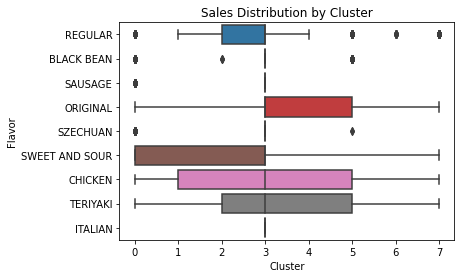

In [703]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of prices per cluster
sns.boxplot(x='Cluster', y='Flavor', data=X_cluster_sample)
plt.title('Sales Distribution by Cluster')
plt.show()


In [705]:
X_cluster_sample

,Product,Flavor,Unit Sales,Cluster
32,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,REGULAR,29839.311737,2
33,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,26328.357411,2
34,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,37.000000,3
35,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BLACK BEAN,4380.000000,3
36,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,REGULAR,2.000000,3
...,...,...,...,...
980921,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,CHICKEN,4120.202403,3
980922,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,CHICKEN,22488.817728,5
980923,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,CHICKEN,35122.618052,2
980924,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,REGULAR,32502.098292,2


In [707]:
result = X_cluster_sample.groupby('Product')['Unit Sales'].sum().reset_index()

In [709]:
result

,Product,Unit Sales
0,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,2.855118e+06
1,GARDEIN FROZEN CHICKEN MEAT SUBSTITUTE FILET 1...,9.716998e+05
2,GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUB...,1.130671e+06
3,GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRI...,3.553339e+06
4,GARDEIN FROZEN CHICKEN SCALLOPINI POULTRY SUBS...,3.807161e+05
...,...,...
64,GARDEIN ULTIMATE PLANT BASED FROZEN ORIGINAL M...,2.622328e+05
65,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,2.761053e+06
66,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,5.701619e+05
67,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,4.535676e+06


In [711]:
product_count=X_cluster_sample.groupby('Product').count().reset_index()
product_count

,Product,Flavor,Unit Sales,Cluster
0,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,211,211,211
1,GARDEIN FROZEN CHICKEN MEAT SUBSTITUTE FILET 1...,96,96,96
2,GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUB...,104,104,104
3,GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRI...,211,211,211
4,GARDEIN FROZEN CHICKEN SCALLOPINI POULTRY SUBS...,211,211,211
...,...,...,...,...
64,GARDEIN ULTIMATE PLANT BASED FROZEN ORIGINAL M...,45,45,45
65,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,202,202,202
66,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,90,90,90
67,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,147,147,147


In [713]:
product_sales=X_cluster_sample.groupby('Product')['Unit Sales'].sum().reset_index()

In [715]:
product_sales

,Product,Unit Sales
0,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,2.855118e+06
1,GARDEIN FROZEN CHICKEN MEAT SUBSTITUTE FILET 1...,9.716998e+05
2,GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUB...,1.130671e+06
3,GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRI...,3.553339e+06
4,GARDEIN FROZEN CHICKEN SCALLOPINI POULTRY SUBS...,3.807161e+05
...,...,...
64,GARDEIN ULTIMATE PLANT BASED FROZEN ORIGINAL M...,2.622328e+05
65,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,2.761053e+06
66,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR ME...,5.701619e+05
67,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,4.535676e+06


In [717]:
product_sales.nsmallest(5, 'Unit Sales')

,Product,Unit Sales
10,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,2.000000
23,GARDEIN FROZEN REGULAR MEAT SUBSTITUTE BREAKFA...,3.939684
62,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,29.710485
13,GARDEIN FROZEN HOMESTYLE MEAT SUBSTITUTE SLICE...,30.600369
22,GARDEIN FROZEN REGULAR FISH SUBSTITUTE FILET 1...,36.024734


In [719]:
flavor_sales=X_cluster_sample.groupby('Flavor')['Unit Sales'].sum().reset_index()

In [721]:
flavor_sales

,Flavor,Unit Sales
0,BLACK BEAN,2.794588e+06
1,CHICKEN,2.696411e+07
2,ITALIAN,2.486597e+05
3,ORIGINAL,2.709221e+06
4,REGULAR,7.394674e+07
5,SAUSAGE,6.375193e+05
6,SWEET AND SOUR,1.873227e+06
7,SZECHUAN,6.187475e+05
8,TERIYAKI,4.766637e+06


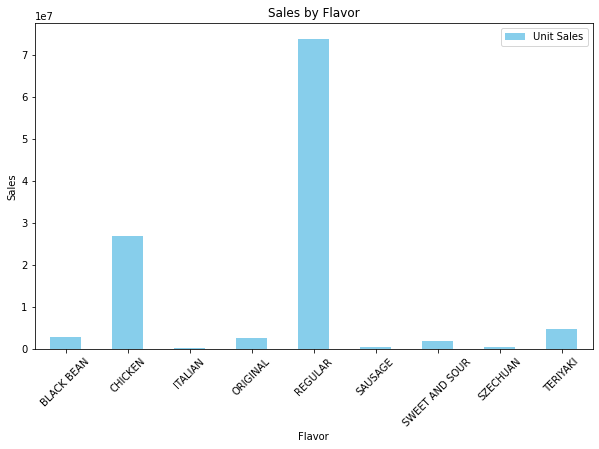

In [723]:
flavor_sales.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [725]:
flavor_count=X_cluster_sample.groupby('Flavor').count().reset_index()
flavor_count

,Flavor,Product,Unit Sales,Cluster
0,BLACK BEAN,677,677,677
1,CHICKEN,1247,1247,1247
2,ITALIAN,347,347,347
3,ORIGINAL,256,256,256
4,REGULAR,6173,6173,6173
5,SAUSAGE,387,387,387
6,SWEET AND SOUR,211,211,211
7,SZECHUAN,211,211,211
8,TERIYAKI,256,256,256


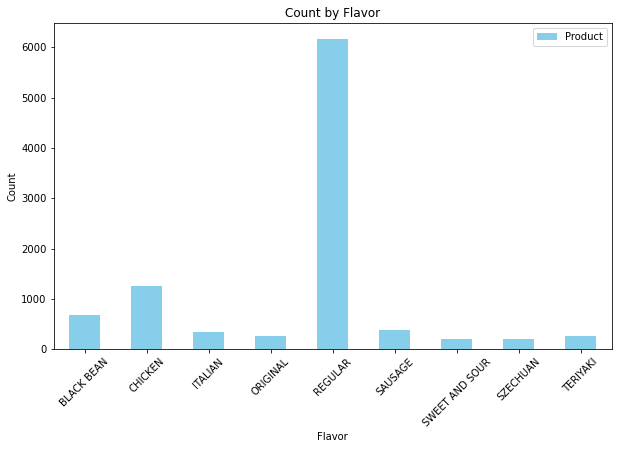

In [727]:
flavor_count.plot(kind='bar', x='Flavor', y='Product', color='skyblue', figsize=(10, 6))

plt.title('Count by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [735]:
df= x_new['Product']
df=df.to_frame()
# Define a function that applies the regex to each row

df_0=x_0['Product']
df_0=df_0.to_frame()
df_1=x_1['Product']
df_1=df_1.to_frame()
df_2=x_2['Product']
df_2=df_2.to_frame()
df_3=x_3['Product']
df_3=df_3.to_frame()
df_4=x_4['Product']
df_4=df_4.to_frame()

In [737]:

# List of values to check against
values_list = ['BURGER','GROUND','NUGGET', 'BREAKFAST SAUSAGE','PATTY', 'MEATBALL','TENDER','DELI','STRIP','BACON','HOT DOG','FILET','WING','PIECE','CAKE','BREAST','LINK']

# Define the default value for non-matching cases
default_value = 'OTHER FORMS'
others=[]
# Function to check for matches and return only the match or default value
def check_for_match(description, values_list):
    for value in values_list:
        if value in description:
            return value
    others.append(description)
    return default_value

# Apply the function to the 'Description' column to create a new 'Match' column
df['Form'] = df['Product'].apply(check_for_match, args=([values_list]))


# Apply the function to the 'Description' column to create a new 'Match' column
df_0['Form'] = df_0['Product'].apply(check_for_match, args=([values_list]))
# Apply the function to the 'Description' column to create a new 'Match' column
df_1['Form'] = df_1['Product'].apply(check_for_match, args=([values_list]))
# Apply the function to the 'Description' column to create a new 'Match' column
df_2['Form'] = df_2['Product'].apply(check_for_match, args=([values_list]))
# Apply the function to the 'Description' column to create a new 'Match' column
df_3['Form'] = df_3['Product'].apply(check_for_match, args=([values_list]))
# Apply the function to the 'Description' column to create a new 'Match' column
df_4['Form'] = df_4['Product'].apply(check_for_match, args=([values_list]))
print(df)

                                                  Product         Form
32      GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...  OTHER FORMS
33      GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...       BURGER
34      GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...       BURGER
35      GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...       BURGER
36      GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...     MEATBALL
...                                                   ...          ...
991548  GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...         WING
991549  GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...       NUGGET
991550  GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...       TENDER
991551  GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...        FILET
991598  GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUB...         WING

[74447 rows x 2 columns]


In [739]:
x_new=pd.concat([x_gardein,df],axis=1)
X_cluster_sample2=x_new[['Product','Form','Unit Sales']]
x20=pd.concat([x_2020,df_0],axis=1)
x21=pd.concat([x_2021,df_1],axis=1)
x22=pd.concat([x_2022,df_2],axis=1)
x23=pd.concat([x_2023,df_3],axis=1)
x24=pd.concat([x_2024,df_4],axis=1)

x20=x20[['Product','Form','Unit Sales']]
x21=x21[['Product','Form','Unit Sales']]
x22=x22[['Product','Form','Unit Sales']]
x23=x23[['Product','Form','Unit Sales']]
x24=x24[['Product','Form','Unit Sales']]


In [741]:
df_encoded = pd.get_dummies(X_cluster_sample2, columns=['Product', 'Form'])
df_encoded.head()

,Unit Sales,Product_GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ - 0842234000511,Product_GARDEIN FROZEN CHICKEN MEAT SUBSTITUTE FILET 15 OZ - 0842234002491,Product_GARDEIN FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE WING 14.8 OZ - 0842234007191,Product_GARDEIN FROZEN CHICKEN POULTRY SUBSTITUTE STRIP 10 OZ - 0842234001621,Product_GARDEIN FROZEN CHICKEN SCALLOPINI POULTRY SUBSTITUTE PATTY 10 OZ - 0842234000482,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 12 OZ - 0842234001631,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 48 OZ - 0842234003191,Product_GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BURGER 50.8 OZ - 0842234001191,Product_GARDEIN FROZEN CHIPOTLE LIME POULTRY SUBSTITUTE FINGER 9.5 OZ - 0842234000801,...,Form_GROUND,Form_LINK,Form_MEATBALL,Form_NUGGET,Form_OTHER FORMS,Form_PATTY,Form_PIECE,Form_STRIP,Form_TENDER,Form_WING
32,29839.311737,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33,26328.357411,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,37.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35,4380.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
36,2.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [743]:
from sklearn.cluster import KMeans

# Number of clusters
k = 10

# K-means clustering
model = KMeans(n_clusters=k, random_state=42)
model.fit(df_encoded)

# Assign the cluster labels to the original dataframe
X_cluster_sample2['Cluster'] = model.labels_

X_cluster_sample2


/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/4100094632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster_sample2['Cluster'] = model.labels_


,Product,Product,Form,Unit Sales,Cluster
32,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,GARDEIN FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ -...,OTHER FORMS,29839.311737,8
33,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BURGER,26328.357411,8
34,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BURGER,37.000000,0
35,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,GARDEIN FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTI...,BURGER,4380.000000,6
36,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,GARDEIN FROZEN CLASSIC MEAT SUBSTITUTE MEATBAL...,MEATBALL,2.000000,0
...,...,...,...,...,...
991548,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,GARDEIN ULTIMATE PLANT BASED FROZEN BBQ PLANT ...,WING,832.785285,0
991549,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PL...,NUGGET,2068.478964,6
991550,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,GARDEIN ULTIMATE PLANT BASED FROZEN CHICKEN PO...,TENDER,3832.912309,6
991551,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,GARDEIN ULTIMATE PLANT BASED FROZEN REGULAR PL...,FILET,3549.700861,6


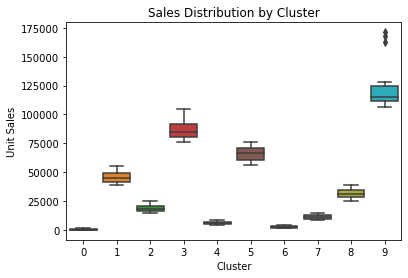

In [744]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of prices per cluster
sns.boxplot(x='Cluster', y='Unit Sales', data=X_cluster_sample2)
plt.title('Sales Distribution by Cluster')
plt.show()


In [745]:
form_count=X_cluster_sample2.groupby('Form').count().reset_index()
form_count

,Form,Product,Product,Unit Sales,Cluster
0,BREAKFAST SAUSAGE,1419,1419,1419,1419
1,BREAST,4302,4302,4302,4302
2,BURGER,13194,13194,13194,13194
3,CAKE,1899,1899,1899,1899
4,FILET,4341,4341,4341,4341
5,GROUND,2028,2028,2028,2028
6,LINK,804,804,804,804
7,MEATBALL,2903,2903,2903,2903
8,NUGGET,2676,2676,2676,2676
9,OTHER FORMS,11705,11705,11705,11705


In [746]:
form_sales=X_cluster_sample2.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales

,Form,Unit Sales
0,BREAKFAST SAUSAGE,1.027948e+06
1,BREAST,2.104068e+07
2,BURGER,2.082727e+07
3,CAKE,2.222307e+06
4,FILET,2.338695e+07
5,GROUND,3.366589e+07
6,LINK,1.140324e+06
7,MEATBALL,2.654819e+07
8,NUGGET,7.507450e+06
9,OTHER FORMS,1.979208e+07


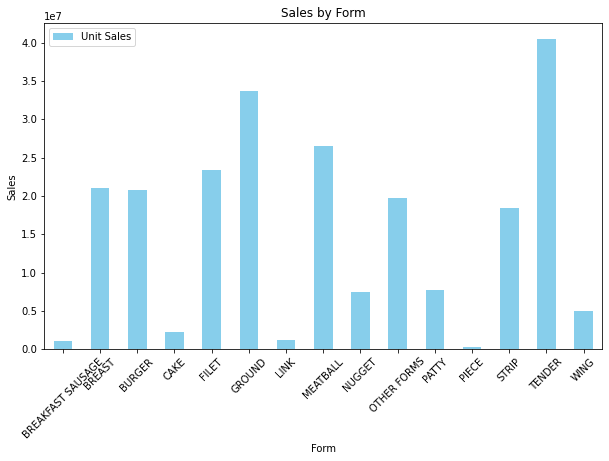

In [747]:
form_sales.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Form')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [748]:
x0=x_0[['Product','Flavor','Unit Sales']]

In [757]:
flavor_sum0=x0.groupby('Flavor').sum().reset_index()

In [850]:
flavor_sum0

,Flavor,2020
0,BLACK BEAN,1.052185e+06
1,CHICKEN,5.892545e+06
2,ORIGINAL,1.091176e+06
3,REGULAR,2.200101e+07
4,SAUSAGE,5.545097e+04
5,SWEET AND SOUR,9.176255e+05
6,SZECHUAN,3.391627e+05
7,TERIYAKI,1.781851e+06


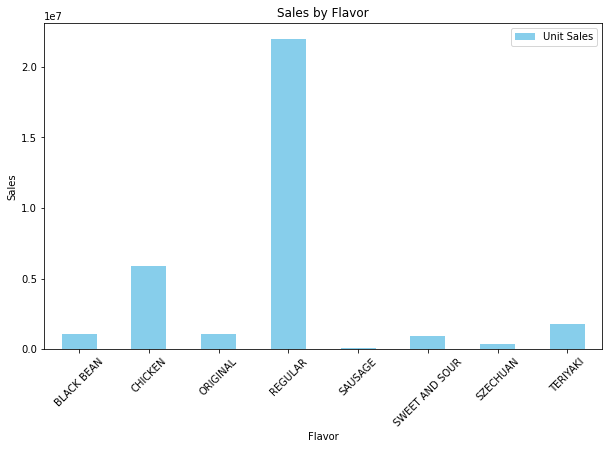

In [759]:
#year 2020
flavor_sum0.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [761]:
x1=x_1[['Product','Flavor','Unit Sales']]

In [763]:
flavor_count1=x1.groupby('Flavor').count().reset_index()

In [854]:
flavor_sum1

,Flavor,2021
0,BLACK BEAN,7.375107e+05
1,CHICKEN,6.250693e+06
2,ITALIAN,7.403696e+04
3,ORIGINAL,8.882760e+05
4,REGULAR,1.962824e+07
5,SAUSAGE,4.430798e+04
6,SWEET AND SOUR,5.760147e+05
7,SZECHUAN,2.258143e+05
8,TERIYAKI,1.317770e+06


In [765]:
flavor_sum1=x1.groupby('Flavor').sum().reset_index()

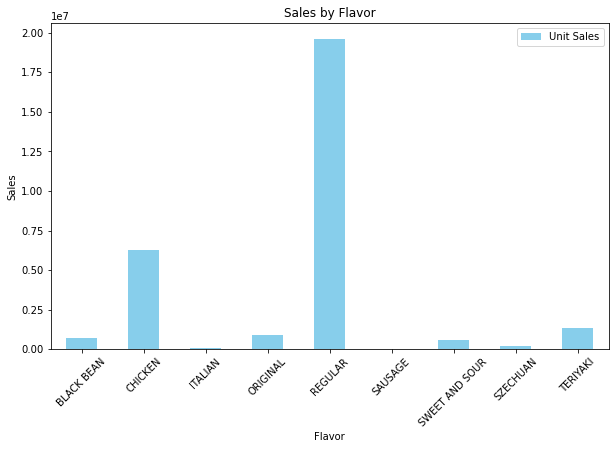

In [767]:
#year 2021
flavor_sum1.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [769]:
x2=x_2[['Product','Flavor','Unit Sales']]

In [771]:
flavor_count2=x2.groupby('Flavor').count().reset_index()

In [773]:
flavor_sum2=x2.groupby('Flavor').sum().reset_index()

In [862]:
flavor_sum2

,Flavor,2022
0,BLACK BEAN,8.034426e+05
1,CHICKEN,7.601282e+06
2,ITALIAN,1.236775e+05
3,ORIGINAL,4.639653e+05
4,REGULAR,1.742852e+07
5,SAUSAGE,1.801870e+05
6,SWEET AND SOUR,3.027587e+05
7,SZECHUAN,5.215705e+04
8,TERIYAKI,1.011887e+06


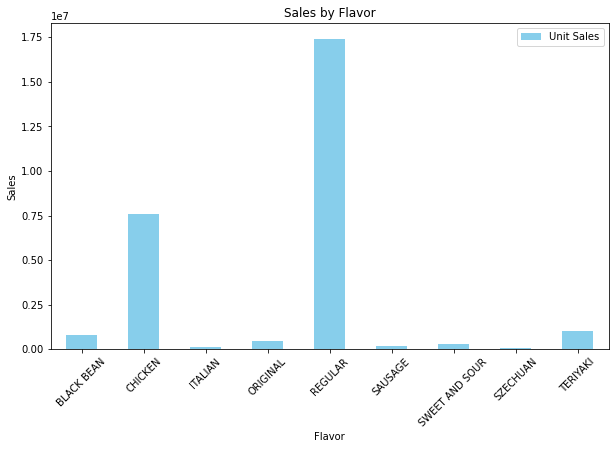

In [775]:
#year 2022
flavor_sum2.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [777]:
x3=x_3[['Product','Flavor','Unit Sales']]

In [779]:
flavor_count3=x3.groupby('Flavor').count().reset_index()

In [781]:
flavor_sum3=x3.groupby('Flavor').sum().reset_index()

In [868]:
(1.388584e+07-1.742852e+07)/1.742852e+07

-0.20326912440069494

In [866]:
flavor_sum3

,Flavor,2023
0,BLACK BEAN,1.923581e+05
1,CHICKEN,6.765623e+06
2,ITALIAN,4.963509e+04
3,ORIGINAL,2.338153e+05
4,REGULAR,1.388584e+07
5,SAUSAGE,3.360718e+05
6,SWEET AND SOUR,7.293148e+04
7,SZECHUAN,1.541892e+03
8,TERIYAKI,6.124867e+05


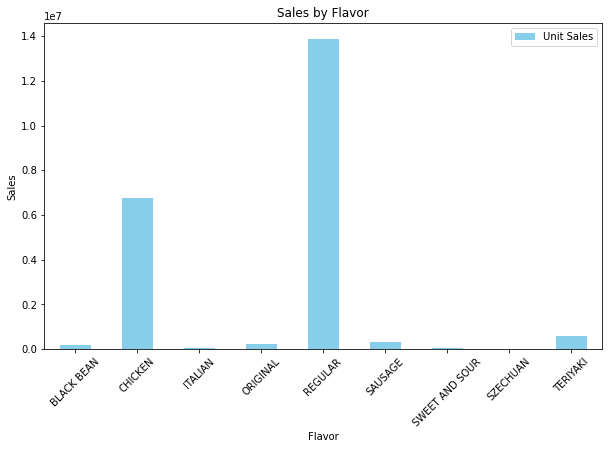

In [783]:
#year 2023
flavor_sum3.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

In [785]:
x4=x_4[['Product','Flavor','Unit Sales']]

In [787]:
flavor_count4=x4.groupby('Flavor').count().reset_index()

In [791]:
flavor_sum4=x4.groupby('Flavor').sum().reset_index()

In [874]:
(1.003122e+06-1.388584e+07)/1.388584e+07

-0.9277593577342098

In [872]:
flavor_sum4

,Flavor,2024
0,BLACK BEAN,9.092305e+03
1,CHICKEN,4.539647e+05
2,ITALIAN,1.310240e+03
3,ORIGINAL,3.198903e+04
4,REGULAR,1.003122e+06
5,SAUSAGE,2.150161e+04
6,SWEET AND SOUR,3.896277e+03
7,SZECHUAN,7.163784e+01
8,TERIYAKI,4.264208e+04


In [793]:
flavor_sum4

,Flavor,Unit Sales
0,BLACK BEAN,9.092305e+03
1,CHICKEN,4.539647e+05
2,ITALIAN,1.310240e+03
3,ORIGINAL,3.198903e+04
4,REGULAR,1.003122e+06
5,SAUSAGE,2.150161e+04
6,SWEET AND SOUR,3.896277e+03
7,SZECHUAN,7.163784e+01
8,TERIYAKI,4.264208e+04


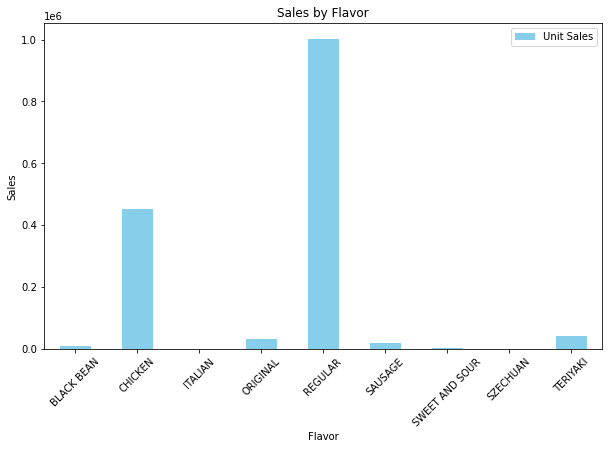

In [795]:
#year 2024
flavor_sum4.plot(kind='bar', x='Flavor', y='Unit Sales', color='skyblue', figsize=(10, 6))

plt.title('Sales by Flavor')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()

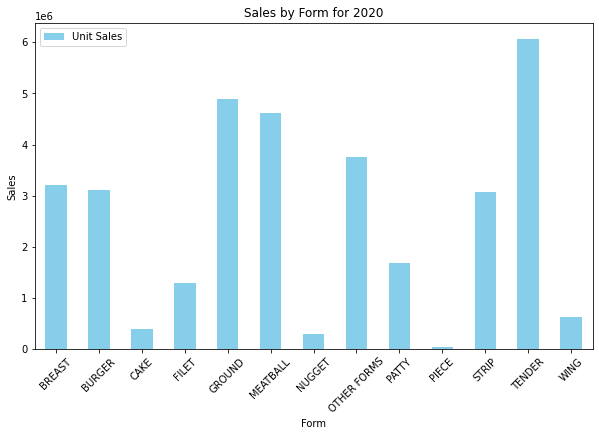

In [884]:
# Code to generate bar graphs for Unit Sales vs Forms( Based on the year dataframe) 
form_sales0=x20.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales0.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))
plt.title('Sales by Form for 2020')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()


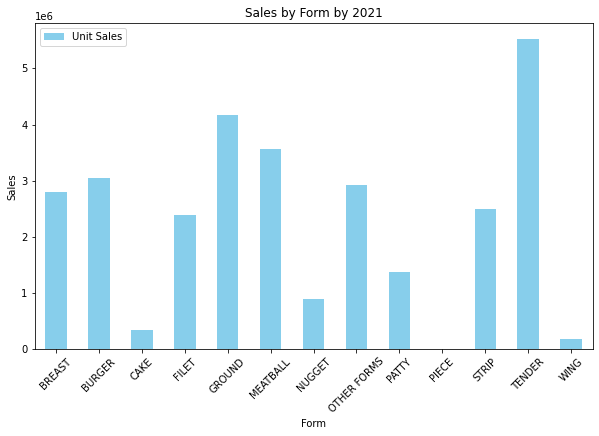

In [886]:
form_sales1=x21.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales1.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))
plt.title('Sales by Form for 2021')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()


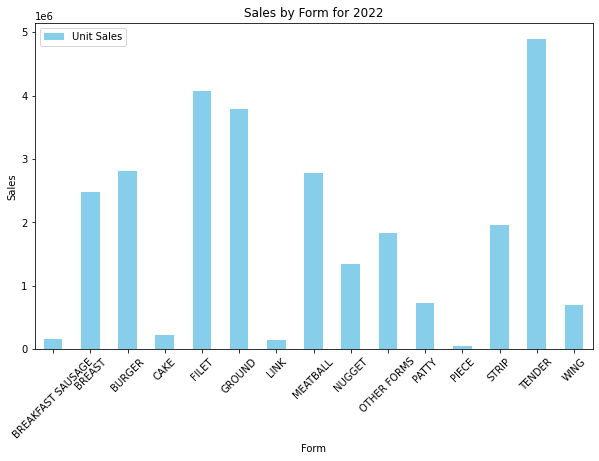

In [888]:
form_sales2=x22.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales2.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))
plt.title('Sales by Form for 2022')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()


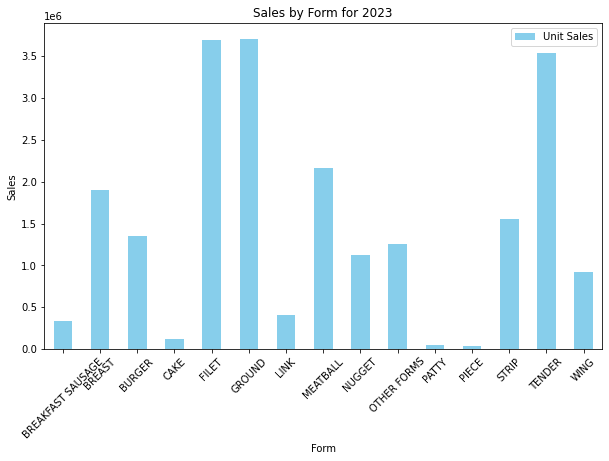

In [890]:
form_sales3=x23.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales3.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))
plt.title('Sales by Form for 2023')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()


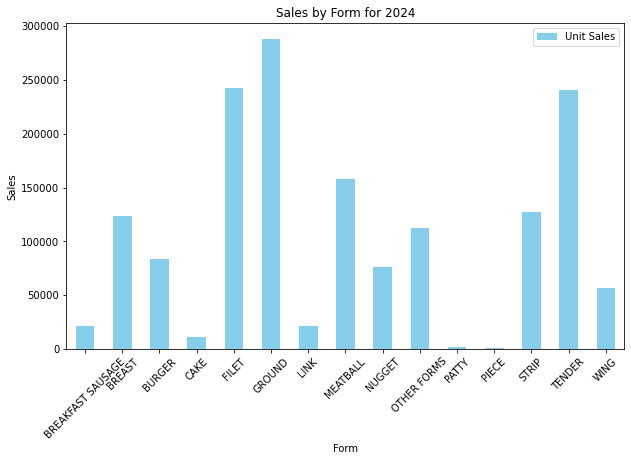

In [892]:
form_sales4=x24.groupby('Form')['Unit Sales'].sum().reset_index()
form_sales4.plot(kind='bar', x='Form', y='Unit Sales', color='skyblue', figsize=(10, 6))
plt.title('Sales by Form for 2024')
plt.xlabel('Form')
plt.ylabel('Sales')
plt.xticks(rotation=45) # Rotate category labels for better readability
plt.show()


In [807]:
form_sales1

,Form,Unit Sales
0,BREAST,2.803306e+06
1,BURGER,3.050312e+06
2,CAKE,3.506457e+05
3,FILET,2.383817e+06
4,GROUND,4.164364e+06
5,MEATBALL,3.560574e+06
6,NUGGET,8.990709e+05
7,OTHER FORMS,2.930354e+06
8,PATTY,1.379258e+06
9,PIECE,1.188679e+04


In [809]:
form_sales2

,Form,Unit Sales
0,BREAKFAST SAUSAGE,1.569262e+05
1,BREAST,2.478680e+06
2,BURGER,2.809417e+06
3,CAKE,2.280186e+05
4,FILET,4.072517e+06
5,GROUND,3.788003e+06
6,LINK,1.401222e+05
7,MEATBALL,2.775029e+06
8,NUGGET,1.347146e+06
9,OTHER FORMS,1.836573e+06


In [811]:
form_sales3

,Form,Unit Sales
0,BREAKFAST SAUSAGE,3.355570e+05
1,BREAST,1.897553e+06
2,BURGER,1.349595e+06
3,CAKE,1.210105e+05
4,FILET,3.690016e+06
5,GROUND,3.707835e+06
6,LINK,4.080797e+05
7,MEATBALL,2.159892e+06
8,NUGGET,1.124680e+06
9,OTHER FORMS,1.255829e+06


In [813]:
form_sales4

,Form,Unit Sales
0,BREAKFAST SAUSAGE,21491.043470
1,BREAST,123533.106756
2,BURGER,83635.795654
3,CAKE,11562.649582
4,FILET,242621.355243
5,GROUND,288289.390490
6,LINK,21960.040106
7,MEATBALL,158135.267124
8,NUGGET,76162.672512
9,OTHER FORMS,112611.846925


In [549]:
((4313.974156-108513.5)/108513.5)   

-0.9602448160274989

In [533]:
1.085135e+05

108513.5

In [551]:
set(others)

{'FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ',
 'FROZEN CHIPOTLE LIME POULTRY SUBSTITUTE FINGER 9.5 OZ',
 'FROZEN HOMESTYLE MEAT SUBSTITUTE SLICE 12.7 OZ',
 'FROZEN HOMESTYLE MEAT SUBSTITUTE TIP 40 OZ',
 'FROZEN ITALIAN SAUSAGE MEAT SUBSTITUTE SLICED 40 OZ',
 'FROZEN REGULAR MEAT SUBSTITUTE CRUMBLE 14 OZ',
 'FROZEN REGULAR MEAT SUBSTITUTE SLICED 9 OZ',
 'FROZEN REGULAR MEAT SUBSTITUTE SLIDER 10 OZ',
 'FROZEN SWEET AND SOUR MEAT SUBSTITUTE BITE 10.5 OZ',
 'FROZEN TURKEY POULTRY SUBSTITUTE CUTLET 12.3 OZ'}

In [311]:
set(regular)

{'FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ',
 'FROZEN CHIPOTLE LIME POULTRY SUBSTITUTE FINGER 9.5 OZ',
 'FROZEN CLASSIC MEAT SUBSTITUTE MEATBALL 12.7 OZ',
 'FROZEN CLASSIC MEAT SUBSTITUTE MEATBALL 15.8 OZ',
 'FROZEN FISH FISH SUBSTITUTE FILET 36 OZ',
 'FROZEN GARDEN MEAT SUBSTITUTE BURGER 12 OZ',
 'FROZEN HOMESTYLE MEAT SUBSTITUTE SLICE 12.7 OZ',
 'FROZEN HOMESTYLE MEAT SUBSTITUTE TIP 40 OZ',
 'FROZEN MANDARIN ORANGE POULTRY SUBSTITUTE BREAST 10.5 OZ',
 'FROZEN NASHVILLE HOT POULTRY SUBSTITUTE TENDER 8.1 OZ',
 'FROZEN ROAST PLANT BASED SUBSTITUTE BREAST 35.2 OZ',
 'FROZEN SAVORY PLANT BASED SUBSTITUTE BREAST 14.1 OZ',
 'FROZEN SAVORY POULTRY SUBSTITUTE PIECE 16 OZ',
 'FROZEN SEVEN GRAIN POULTRY SUBSTITUTE TENDER 32 OZ',
 'FROZEN SEVEN GRAIN POULTRY SUBSTITUTE TENDER 40 OZ',
 'FROZEN SIZZLING SZECHUAN MEAT SUBSTITUTE STRIP 10.6 OZ',
 'FROZEN SPICY MEAT SUBSTITUTE BREAKFAST PATTY 8 OZ',
 'FROZEN SWEET AND SOUR MEAT SUBSTITUTE BITE 10.5 OZ',
 'FROZEN SWEET AND TANGY POULTRY SUBSTITUTE WING 9 

In [815]:
flavor_sum0.rename({'Unit Sales':'2020'}, axis='columns',inplace=True)
flavor_sum1.rename({'Unit Sales':'2021'}, axis='columns',inplace=True)
flavor_sum2.rename({'Unit Sales':'2022'}, axis='columns',inplace=True)
flavor_sum3.rename({'Unit Sales':'2023'}, axis='columns',inplace=True)
flavor_sum4.rename({'Unit Sales':'2024'}, axis='columns',inplace=True)

In [817]:
res=pd.concat([flavor_sum4,flavor_sum3['2023'].to_frame(),flavor_sum2['2022'].to_frame(),flavor_sum1['2021'].to_frame(),flavor_sum0['2020'].to_frame()],axis="columns")

In [819]:
res

,Flavor,2024,2023,2022,2021,2020
0,BLACK BEAN,9.092305e+03,1.923581e+05,8.034426e+05,7.375107e+05,1.052185e+06
1,CHICKEN,4.539647e+05,6.765623e+06,7.601282e+06,6.250693e+06,5.892545e+06
2,ITALIAN,1.310240e+03,4.963509e+04,1.236775e+05,7.403696e+04,1.091176e+06
3,ORIGINAL,3.198903e+04,2.338153e+05,4.639653e+05,8.882760e+05,2.200101e+07
4,REGULAR,1.003122e+06,1.388584e+07,1.742852e+07,1.962824e+07,5.545097e+04
5,SAUSAGE,2.150161e+04,3.360718e+05,1.801870e+05,4.430798e+04,9.176255e+05
6,SWEET AND SOUR,3.896277e+03,7.293148e+04,3.027587e+05,5.760147e+05,3.391627e+05
7,SZECHUAN,7.163784e+01,1.541892e+03,5.215705e+04,2.258143e+05,1.781851e+06
8,TERIYAKI,4.264208e+04,6.124867e+05,1.011887e+06,1.317770e+06,NaN


In [821]:
res.to_excel('output.xlsx', index=False)

In [825]:
set(x_new1["Geography"])

{'California - Standard - Multi Outlet + Conv',
 'Great Lakes - Standard - Multi Outlet + Conv',
 'Mid-South - Standard - Multi Outlet + Conv',
 'Northeast - Standard - Multi Outlet + Conv',
 'Plains - Standard - Multi Outlet + Conv',
 'South Central - Standard - Multi Outlet + Conv',
 'Southeast - Standard - Multi Outlet + Conv',
 'Total US - Multi Outlet + Conv',
 'West - Standard - Multi Outlet + Conv'}

In [827]:
x_newg=x_new1[['Geography','Product','Flavor','Unit Sales']]

In [829]:
x_newg=x_newg[x_newg['Flavor'].isin(['CHICKEN','ORIGINAL','REGULAR','TERIYAKI'])]
set(x_newg['Flavor'])

{'CHICKEN', 'ORIGINAL', 'REGULAR', 'TERIYAKI'}

In [831]:
r1=x_newg[x_newg['Geography']=='California - Standard - Multi Outlet + Conv']
r2=x_newg[x_newg['Geography']=='Great Lakes - Standard - Multi Outlet + Conv']
r3=x_newg[x_newg['Geography']=='Mid-South - Standard - Multi Outlet + Conv']
r4=x_newg[x_newg['Geography']=='Northeast - Standard - Multi Outlet + Conv']
r5=x_newg[x_newg['Geography']=='Plains - Standard - Multi Outlet + Conv']
r6=x_newg[x_newg['Geography']=='South Central - Standard - Multi Outlet + Conv']
r7=x_newg[x_newg['Geography']=='Southeast - Standard - Multi Outlet + Conv']
r8=x_newg[x_newg['Geography']=='Total US - Multi Outlet + Conv']
r9=x_newg[x_newg['Geography']=='West - Standard - Multi Outlet + Conv']

In [833]:
r1.drop(["Geography","Product"],axis=1,inplace=True)

/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/4070900673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1.drop(["Geography","Product"],axis=1,inplace=True)


In [835]:
r2.drop(["Geography","Product"],axis=1,inplace=True)
r3.drop(["Geography","Product"],axis=1,inplace=True)
r4.drop(["Geography","Product"],axis=1,inplace=True)
r5.drop(["Geography","Product"],axis=1,inplace=True)
r6.drop(["Geography","Product"],axis=1,inplace=True)
r7.drop(["Geography","Product"],axis=1,inplace=True)
r8.drop(["Geography","Product"],axis=1,inplace=True)
r9.drop(["Geography","Product"],axis=1,inplace=True)

/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/2749760163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r2.drop(["Geography","Product"],axis=1,inplace=True)
/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/2749760163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r3.drop(["Geography","Product"],axis=1,inplace=True)
/var/folders/x3/5n0yyb7911zg532jx71xlkrr0000gn/T/ipykernel_95163/2749760163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [837]:
r1=r1.groupby('Flavor')['Unit Sales'].sum().reset_index()

r2=r2.groupby('Flavor')['Unit Sales'].sum().reset_index()

r3=r3.groupby('Flavor')['Unit Sales'].sum().reset_index()

r4=r4.groupby('Flavor')['Unit Sales'].sum().reset_index()

r5=r5.groupby('Flavor')['Unit Sales'].sum().reset_index()

r6=r6.groupby('Flavor')['Unit Sales'].sum().reset_index()

r7=r7.groupby('Flavor')['Unit Sales'].sum().reset_index()

r8=r8.groupby('Flavor')['Unit Sales'].sum().reset_index()

r9=r9.groupby('Flavor')['Unit Sales'].sum().reset_index()


In [839]:
r1

,Flavor,Unit Sales
0,CHICKEN,3.503206e+06
1,ORIGINAL,1.880644e+05
2,REGULAR,7.722969e+06
3,TERIYAKI,7.607677e+05


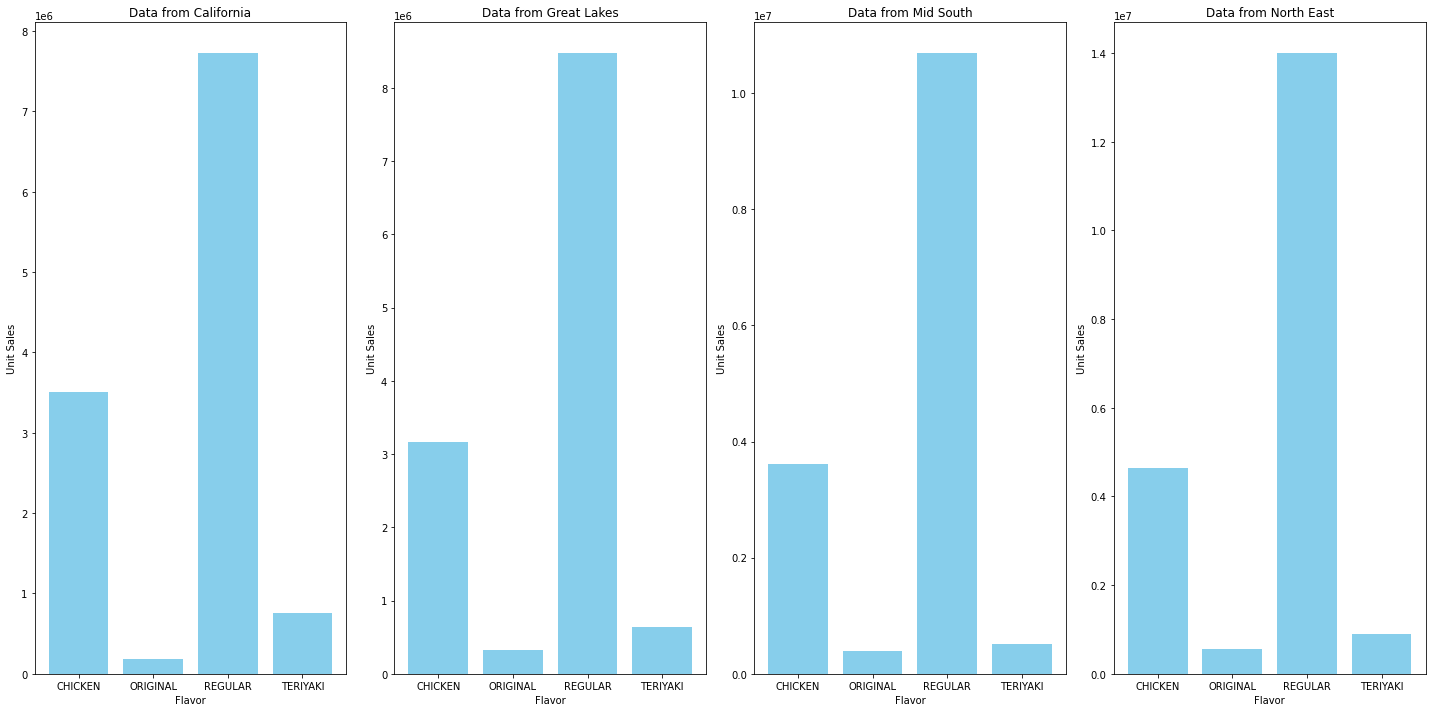

In [841]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
# Plot data  
axs[0].bar(r1['Flavor'], r1['Unit Sales'], color='skyblue')
axs[0].set_title('Data from California')
axs[0].set_ylabel('Unit Sales')
axs[0].set_xlabel('Flavor')

axs[1].bar(r2['Flavor'], r2['Unit Sales'], color='skyblue')
axs[1].set_title('Data from Great Lakes')
axs[1].set_ylabel('Unit Sales')
axs[1].set_xlabel('Flavor')

axs[2].bar(r3['Flavor'], r3['Unit Sales'], color='skyblue')
axs[2].set_title('Data from Mid South')
axs[2].set_ylabel('Unit Sales')
axs[2].set_xlabel('Flavor')

axs[3].bar(r4['Flavor'], r4['Unit Sales'], color='skyblue')
axs[3].set_title('Data from North East')
axs[3].set_ylabel('Unit Sales')
axs[3].set_xlabel('Flavor')


plt.tight_layout()
plt.show()

Text(0.5, 0, 'Flavor')

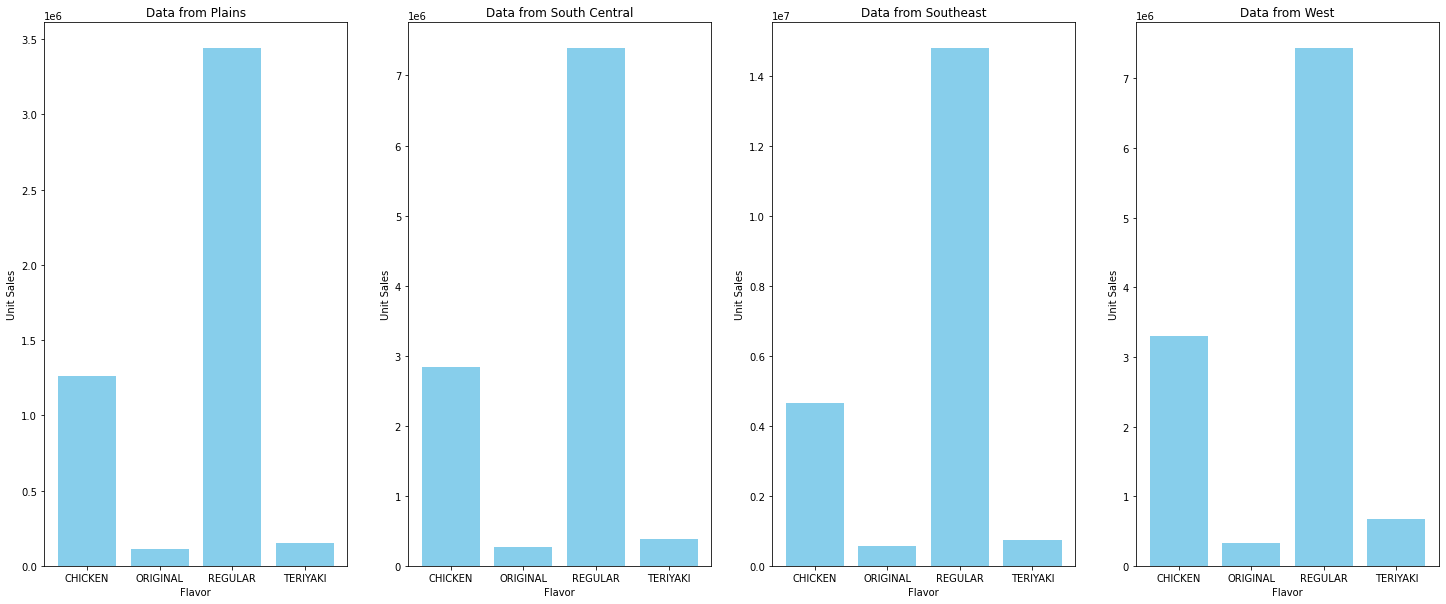

In [882]:
fig, axs = plt.subplots(1, 4, figsize=(25, 10))
axs[0].bar(r5['Flavor'], r5['Unit Sales'], color='skyblue')
axs[0].set_title('Data from Plains')
axs[0].set_ylabel('Unit Sales')
axs[0].set_xlabel('Flavor')

axs[1].bar(r6['Flavor'], r6['Unit Sales'], color='skyblue')
axs[1].set_title('Data from South Central')
axs[1].set_ylabel('Unit Sales')
axs[1].set_xlabel('Flavor')

axs[2].bar(r7['Flavor'], r7['Unit Sales'], color='skyblue')
axs[2].set_title('Data from Southeast')
axs[2].set_ylabel('Unit Sales')
axs[2].set_xlabel('Flavor')


axs[3].bar(r9['Flavor'], r9['Unit Sales'], color='skyblue')
axs[3].set_title('Data from West')
axs[3].set_ylabel('Unit Sales')
axs[3].set_xlabel('Flavor')

In [876]:
a=pd.read_excel('NET Data.xlsx')

In [878]:
a

,Circana/NPD Data for UTD Meat Alternatives,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Source: Circana/ National Eating Trends®; Sour...,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,Table of Contents,NaN,NaN,NaN,NaN
3,Sources and Measures,NaN,NaN,NaN,NaN
4,Occasion,NaN,When the item was consumed,NaN,NaN
5,Who Present,NaN,Who was present at the occasion,NaN,NaN
6,Appliance Used,NaN,Appliance used at the occasion with each item ...,NaN,NaN
7,Motivations,NaN,Motivations for consuming all items at the occ...,NaN,NaN
8,How Used,NaN,"How the item was used (ingredient, topping, co...",NaN,NaN
9,NaN,NaN,NaN,NaN,NaN
